In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [6]:
df=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.shape

(299, 13)

In [9]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [10]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
53,70.0,1,69,1,50,1,351000.0,1.0,134,0,0,44
172,70.0,1,171,0,60,1,176000.0,1.1,145,1,1,146
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22
98,60.0,1,156,1,25,1,318000.0,1.2,137,0,0,85
244,54.0,0,582,1,38,0,264000.0,1.8,134,1,0,213


In [11]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
X_train=S.fit_transform(X_train)
X_test=S.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
lr=LogisticRegression()
Dt=DecisionTreeClassifier()
model1=lr.fit(X_train,y_train)
model2=Dt.fit(X_train,y_train)

In [14]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))

0.8666666666666667
0.85


In [16]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(model1, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model1, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(model2, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model2, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.8155303030303032
0.8499999999999999
0.75
0.8166666666666667


In [17]:
iris=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')

In [18]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.2,random_state=2)

In [20]:
S=StandardScaler()
X_train=S.fit_transform(X_train)
X_test=S.transform(X_test)

In [21]:
# from sklearn.preprocessing import LabelEncoder
# L= LabelEncoder()
# y_test=L.fit_transform(y_test)
# y_train=L.fit_transform(y_train)

In [22]:
lr=LogisticRegression(max_iter=100000)
Dt=DecisionTreeClassifier()
model_lr=lr.fit(X_train,y_train)
model_dt=Dt.fit(X_train,y_train)

In [23]:
y_pred_lr=model_lr.predict(X_test)
y_pred_dt=model_dt.predict(X_test)

In [24]:
y_pred_lr=model_lr.predict(X_test)
y_pred_dt=model_dt.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_dt))

0.9666666666666667
0.9333333333333333


In [25]:
kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model_lr, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(model_dt, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model_dt, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9500000000000002
0.875
0.9583333333333334
0.85


In [26]:
y_test[:1]

6    Iris-setosa
Name: class, dtype: object

In [27]:
categories=iris['class'].unique()
categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
# categories=df['quality'].unique()
# categories

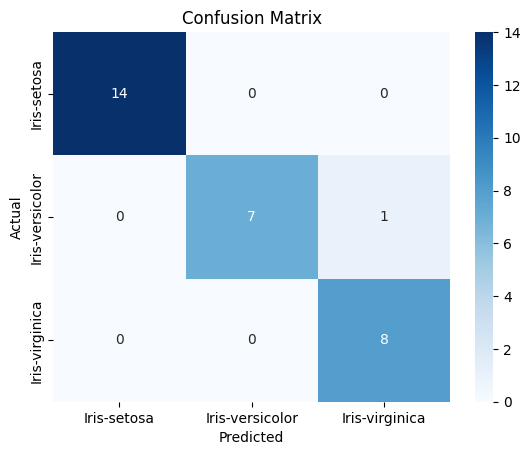

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True ,fmt='d', cmap='Blues',xticklabels=categories, 
            yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

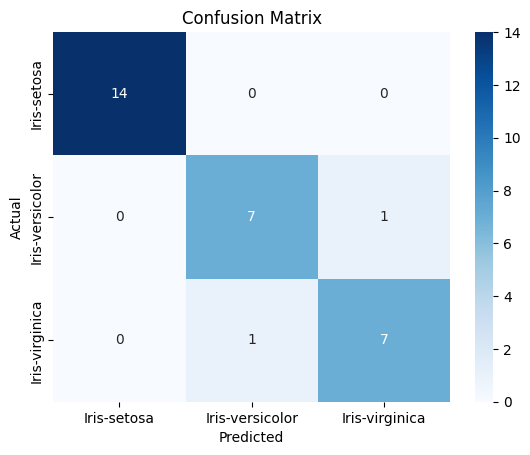

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True ,fmt='d', cmap='Blues',xticklabels=categories, 
            yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
28/30

0.9333333333333333

In [50]:
df=pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [51]:
categories=df['quality'].unique()
categories

array([5, 6, 7, 4, 8, 3])

In [52]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [53]:
S=StandardScaler()
X_train=S.fit_transform(X_train)
X_test=S.transform(X_test)

In [54]:
lr=LogisticRegression(max_iter=100000)
Dt=DecisionTreeClassifier()
model_lr=lr.fit(X_train,y_train)
model_dt=Dt.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
y_pred_dt=model_dt.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_dt))

0.60625
0.5875


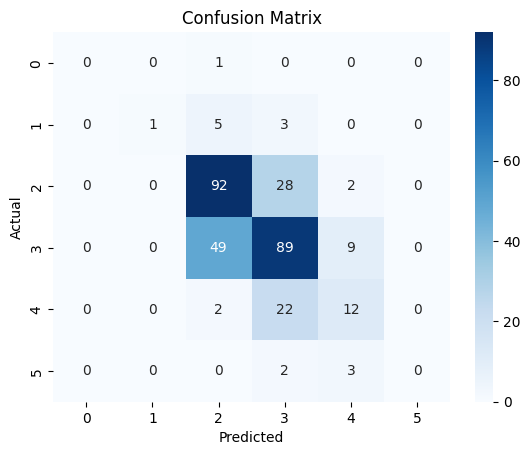

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True ,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# from tpot import TPOTClassifier

# tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))

In [42]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [43]:
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred_lr),columns=categories)
cdf

,5,6,7,4,8,3
0,0,0,1,0,0,0
1,0,1,5,3,0,0
2,0,0,92,28,2,0
3,0,0,49,89,9,0
4,0,0,2,22,12,0
5,0,0,0,2,3,0


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Micro average (suitable for overall performance)
print("Precision (Micro):", precision_score(y_test, y_pred_lr, average='micro'))
print("Recall (Micro):", recall_score(y_test, y_pred_lr, average='micro'))
print("F1 Score (Micro):", f1_score(y_test, y_pred_lr, average='micro'))

# Macro average (treats all classes equally)
print("Precision (Macro):", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred_lr, average='macro'))

# Weighted average (considers class imbalance)
print("Precision (Weighted):", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall (Weighted):", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score (Weighted):", f1_score(y_test, y_pred_lr, average='weighted'))


Precision (Micro): 0.60625
Recall (Micro): 0.60625
F1 Score (Micro): 0.60625
Precision (Macro): 0.4495072802539246
Recall (Macro): 0.30066416366182175
F1 Score (Macro): 0.31295790210978264
Precision (Weighted): 0.5993700323201686
Recall (Weighted): 0.60625
F1 Score (Weighted): 0.5890217436988969


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Micro average (suitable for overall performance)
print("Precision (Micro):", precision_score(y_test, y_pred_dt, average='micro'))
print("Recall (Micro):", recall_score(y_test, y_pred_dt, average='micro'))
print("F1 Score (Micro):", f1_score(y_test, y_pred_dt, average='micro'))

# Macro average (treats all classes equally)
print("Precision (Macro):", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred_dt, average='macro'))

# Weighted average (considers class imbalance)
print("Precision (Weighted):", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall (Weighted):", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score (Weighted):", f1_score(y_test, y_pred_dt, average='weighted'))

Precision (Micro): 0.6
Recall (Micro): 0.6
F1 Score (Micro): 0.6
Precision (Macro): 0.36243222130318903
Recall (Macro): 0.3733919432982666
F1 Score (Macro): 0.36637818717016596
Precision (Weighted): 0.6187538771712159
Recall (Weighted): 0.6
F1 Score (Weighted): 0.6075459376755556


In [47]:
print("Precision (Micro):", precision_score(y_test, y_pred_lr, average=None,zero_division=0))

Precision (Micro): [0.         1.         0.61744966 0.61805556 0.46153846 0.        ]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.11      0.20         9
           5       0.62      0.75      0.68       122
           6       0.62      0.61      0.61       147
           7       0.46      0.33      0.39        36
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.45      0.30      0.31       320
weighted avg       0.60      0.61      0.59       320

